### In This Notebook we have Randomly selected the 10,000 data rows and implemented LDA Models.

In [2]:
# Gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pandas as pd
import numpy as np
np.random.seed(2020)

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

/opt/conda/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
data = pd.read_excel('../input/abstractsclean/AbstractsCleanUpdated_v1.xlsx', usecols=['Publication Date','Title','Abstract']);
data.head(5)

,Publication Date,Title,Abstract
0,2020-01-01,"Dry Taps? A Synthesis of Alternative ""Wash"" Me...",Objective: Social distancing and hand washing ...
1,2020-01-17,"Pneumonia of unknown aetiology in Wuhan, China...",There is currently an outbreak of pneumonia of...
2,2020-01-19,A mathematical model for simulating the transm...,"As reported by the World Health Organization, ..."
3,2020-01-21,Epidemiological and Clinical Characteristics o...,"Background: Since December 2019, a novel coron..."
4,2020-01-22,Functional assessment of cell entry and recept...,"Over the past 20 years, several coronaviruses ..."


In [4]:
from sklearn.utils import shuffle
df = shuffle(data)
data = df[:10000]

In [5]:
#data =data.sample(n=10000)
data.tail()

,Publication Date,Title,Abstract
19903,2020-06-16,The Kinetics of Humoral Response and its Relat...,Coronavirus Disease 2019 (COVID-19) has caused...
4741,2020-04-16,Outcome of Coronavirus spectrum infections (SA...,The aim of this systematic review was to repor...
38881,2020-08-25,Phylogenetic analysis of SARS-CoV-2 in the Bos...,"SARS-CoV-2 has caused a severe, ongoing outbre..."
56866,2020-10-22,The Important Herbal Pair for the Treatment of...,Abstract\n \nBackground: Coronavirus Disease ...
17883,2020-06-09,Temporal evolution of COVID-19 in the states o...,COVID 19 entered during the last week of April...


In [6]:
with open('../input/stopwords/StopWordsList.txt', 'r') as s:
    sw = s.readlines()
    stopwords_data = list(map(lambda x: x.replace('\n',''), sw))
    stopwords_data[0] = '$ 0.002'
    
    
# NLTK Stop words
stop_words = stopwords.words('english')

#extending stopwords with some custom stopwords
stop_words.extend(stopwords_data)

In [7]:
documents = data.Abstract.to_list()

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(documents))

print(data_words[:1])

[['headed', 'for', 'the', 'end', 'of', 'emergence', 'of', 'severe', 'acute', 'respiratory', 'syndrome', 'called', 'covid', 'has', 'created', 'international', 'public', 'emergency', 'and', 'caused', 'worldwide', 'outbreak', 'the', 'covid', 'influence', 'is', 'continuously', 'increasing', 'despite', 'global', 'containment', 'and', 'quarantine', 'efforts', 'this', 'article', 'presents', 'the', 'promotion', 'and', 'effective', 'solution', 'of', 'important', 'remedy', 'action', 'social', 'distancing', 'to', 'be', 'adopted', 'against', 'impact', 'of', 'coronavirus', 'on', 'mankind', 'robotics', 'in', 'medical', 'hospital', 'is', 'manner', 'of', 'technical', 'growth', 'in', 'the', 'medical', 'field', 'that', 'uses', 'robotic', 'systems', 'to', 'help', 'in', 'building', 'social', 'distancing', 'between', 'patient', 'and', 'hospital', 'workers', 'these', 'robots', 'reduce', 'the', 'risk', 'of', 'spreading', 'corona', 'virus', 'to', 'the', 'hospital', 'staff', 'from', 'the', 'vicinity', 'of', 'p

In [9]:

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# To get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Print trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['headed', 'for', 'the', 'end', 'of', 'emergence', 'of', 'severe', 'acute', 'respiratory_syndrome', 'called', 'covid', 'has', 'created', 'international', 'public', 'emergency', 'and', 'caused', 'worldwide', 'outbreak', 'the', 'covid', 'influence', 'is', 'continuously', 'increasing', 'despite', 'global', 'containment', 'and', 'quarantine', 'efforts', 'this', 'article', 'presents', 'the', 'promotion', 'and', 'effective', 'solution', 'of', 'important', 'remedy', 'action', 'social_distancing', 'to', 'be', 'adopted', 'against', 'impact', 'of', 'coronavirus', 'on', 'mankind', 'robotics', 'in', 'medical', 'hospital', 'is', 'manner', 'of', 'technical', 'growth', 'in', 'the', 'medical', 'field', 'that', 'uses', 'robotic', 'systems', 'to', 'help', 'in', 'building', 'social_distancing', 'between', 'patient', 'and', 'hospital', 'workers', 'these', 'robots', 'reduce', 'the', 'risk', 'of', 'spreading', 'corona_virus', 'to', 'the', 'hospital', 'staff', 'from', 'the', 'vicinity', 'of', 'patient', 'the

In [10]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['severe', 'acute', 'respiratory', 'syndrome', 'call', 'covid', 'create', 'international', 'public', 'cause', 'worldwide', 'outbreak', 'covid', 'influence', 'continuously', 'increase', 'global', 'containment', 'quarantine', 'effort', 'article', 'promotion', 'effective', 'solution', 'important', 'remedy', 'action', 'social_distancing', 'adopt', 'impact', 'coronavirus', 'mankind', 'robotic', 'medical', 'hospital', 'manner', 'growth', 'medical', 'field', 'robotic', 'system', 'help', 'build', 'social_distance', 'patient', 'hospital', 'worker', 'robot', 'reduce', 'risk', 'spread', 'hospital', 'staff', 'vicinity', 'patient', 'paper', 'depict', 'design', 'implementation', 'control', 'methodology', 'specific', 'hospital', 'robot', 'abundant', 'combat', 'pandemic', 'covid', 'propose', 'control', 'scheme', 'group', 'fuzzy', 'logic', 'control', 'slide', 'ease', 'design', 'high', 'degree', 'robustness', 'inspire', 'technique', 'robotic', 'matlab', 'simulation', 'carry', 'specific', 'humanoid', 'r

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 5), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 2), (68, 1), (69, 1), (70, 4), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 3), (79, 3), (80, 1), (81, 1), (82, 1), (83, 2), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1)]]


In [13]:
# Term-frequency
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abundant', 1),
  ('action', 1),
  ('acute', 1),
  ('adaptive', 1),
  ('adopt', 1),
  ('article', 1),
  ('band', 1),
  ('build', 1),
  ('call', 1),
  ('carry', 1),
  ('cause', 1),
  ('combat', 1),
  ('compare', 1),
  ('containment', 1),
  ('continuously', 1),
  ('control', 5),
  ('controller', 1),
  ('coronavirus', 1),
  ('covid', 3),
  ('create', 1),
  ('definite', 1),
  ('degree', 1),
  ('depict', 1),
  ('design', 2),
  ('desire', 1),
  ('digital', 2),
  ('discard', 1),
  ('doctor', 1),
  ('ease', 1),
  ('effective', 1),
  ('effort', 1),
  ('execution', 1),
  ('field', 1),
  ('follow', 1),
  ('formulate', 1),
  ('frequency', 1),
  ('fuzzy', 2),
  ('global', 1),
  ('group', 1),
  ('growth', 1),
  ('help', 1),
  ('high', 1),
  ('hospital', 4),
  ('humanoid', 1),
  ('impact', 1),
  ('implementation', 1),
  ('important', 1),
  ('increase', 1),
  ('influence', 1),
  ('inspire', 1),
  ('international', 1),
  ('law', 1),
  ('logic', 1),
  ('mankind', 1),
  ('manner', 1),
  ('matlab', 1),

In [14]:
# Building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=11, 
                                            random_state=100,
                                            chunksize=100,
                                            passes=10)

In [15]:
# Print the Keyword in the 11 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.078*"student" + 0.045*"awareness" + 0.037*"digital" + 0.029*"pharmacist" '
  '+ 0.027*"speed" + 0.024*"education" + 0.022*"programme" + 0.022*"success" + '
  '0.019*"security" + 0.018*"register"'),
 (1,
  '0.022*"pandemic" + 0.014*"challenge" + 0.014*"covid" + 0.014*"review" + '
  '0.013*"health" + 0.012*"evidence" + 0.011*"system" + 0.011*"article" + '
  '0.011*"new" + 0.010*"crisis"'),
 (2,
  '0.079*"group" + 0.071*"age" + 0.038*"high" + 0.037*"year" + 0.035*"factor" '
  '+ 0.030*"difference" + 0.026*"analysis" + 0.026*"compare" + 0.023*"level" + '
  '0.022*"significantly"'),
 (3,
  '0.024*"covid" + 0.023*"infection" + 0.022*"case" + 0.022*"spread" + '
  '0.021*"transmission" + 0.015*"control" + 0.014*"country" + 0.014*"measure" '
  '+ 0.014*"outbreak" + 0.013*"disease"'),
 (4,
  '0.075*"patient" + 0.047*"covid" + 0.016*"severe" + 0.015*"clinical" + '
  '0.013*"disease" + 0.012*"risk" + 0.011*"infection" + 0.011*"respiratory" + '
  '0.011*"case" + 0.010*"report"'),
 (5,
  '

In [17]:
lda_model.show_topics(num_topics=11, num_words=50, log=False, formatted=True)

[(0,
  '0.078*"student" + 0.045*"awareness" + 0.037*"digital" + 0.029*"pharmacist" + 0.027*"speed" + 0.024*"education" + 0.022*"programme" + 0.022*"success" + 0.019*"security" + 0.018*"register" + 0.017*"rank" + 0.016*"misinformation" + 0.016*"ignore" + 0.014*"smartphone" + 0.014*"unique" + 0.013*"solution" + 0.012*"internal" + 0.012*"app" + 0.011*"reader" + 0.009*"residency" + 0.009*"traffic" + 0.009*"privacy" + 0.008*"hispanic" + 0.008*"fill" + 0.008*"motivate" + 0.007*"dashboard" + 0.006*"sample_size" + 0.006*"didactic" + 0.006*"proxy" + 0.006*"disclosure" + 0.005*"cooperation" + 0.005*"rotation" + 0.005*"college" + 0.005*"campus" + 0.005*"military" + 0.004*"visitor" + 0.004*"densely_populate" + 0.004*"launch" + 0.003*"politic" + 0.003*"applicant" + 0.003*"project" + 0.003*"linkage" + 0.003*"prepared" + 0.002*"competency" + 0.002*"universitie" + 0.002*"facebook" + 0.002*"achievement" + 0.002*"consortium" + 0.002*"undergraduate" + 0.002*"educator"'),
 (1,
  '0.022*"pandemic" + 0.014*

In [18]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.28920855007969

Coherence Score:  0.4873300953764685


## Finding the optimal number of topics

In [19]:
def compute_LDA_coherence(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics, 
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=10)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
LDA_model_list, LDA_coherence_values = compute_LDA_coherence(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=39)

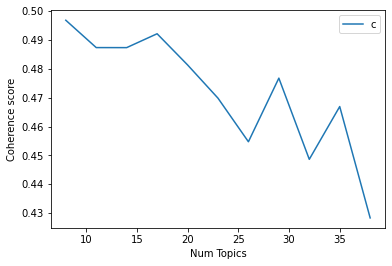

Num Topics = 8  has Coherence Value of 0.4968
Num Topics = 11  has Coherence Value of 0.4873
Num Topics = 14  has Coherence Value of 0.4873
Num Topics = 17  has Coherence Value of 0.4921
Num Topics = 20  has Coherence Value of 0.4813
Num Topics = 23  has Coherence Value of 0.4698
Num Topics = 26  has Coherence Value of 0.4547
Num Topics = 29  has Coherence Value of 0.4767
Num Topics = 32  has Coherence Value of 0.4486
Num Topics = 35  has Coherence Value of 0.4669
Num Topics = 38  has Coherence Value of 0.4283


In [26]:
# Show graph
limit=39; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, LDA_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, LDA_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [27]:
# Select the model with 14 topics and print the topics with 50 words
lda_optimal_model = LDA_model_list[0]
lda_model_topics = lda_optimal_model.show_topics(formatted=False)
pprint(lda_optimal_model.print_topics(num_words=50))

[(0,
  '0.090*"child" + 0.020*"student" + 0.013*"school" + 0.011*"say" + '
  '0.010*"education" + 0.010*"online" + 0.010*"parent" + 0.009*"resident" + '
  '0.009*"digital" + 0.009*"family" + 0.008*"internet" + 0.007*"pharmacist" + '
  '0.007*"pharmacy" + 0.007*"news" + 0.007*"video" + 0.006*"mandate" + '
  '0.006*"write" + 0.006*"right" + 0.006*"company" + 0.006*"theory" + '
  '0.006*"member" + 0.006*"information" + 0.006*"imperative" + 0.005*"ease" + '
  '0.005*"phone" + 0.005*"solution" + 0.005*"course" + 0.005*"meeting" + '
  '0.005*"learn" + 0.005*"volunteer" + 0.004*"indian" + 0.004*"misinformation" '
  '+ 0.004*"interruption" + 0.004*"success" + 0.004*"habit" + 0.004*"form" + '
  '0.004*"platform" + 0.004*"feel" + 0.004*"permission" + 0.004*"feeling" + '
  '0.004*"perioperative" + 0.004*"couple" + 0.004*"idea" + 0.004*"disseminate" '
  '+ 0.004*"leave" + 0.004*"come" + 0.004*"communication" + 0.003*"credit" + '
  '0.003*"launch" + 0.003*"outside"'),
 (1,
  '0.029*"pandemic" + 0.0

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.134900  0.029057       1        1  31.623157
3     -0.127275  0.024559       2        1  15.994958
1     -0.037111  0.066818       3        1  14.095599
6     -0.000886  0.207949       4        1   9.997877
5     -0.076322 -0.143002       5        1   9.713527
7     -0.059552  0.130783       6        1   9.712980
2     -0.015716 -0.319618       7        1   6.774363
0      0.451762  0.003454       8        1   2.087540, topic_info=             Term          Freq         Total Category  logprob  loglift
66        patient  27964.000000  27964.000000  Default  30.0000  30.0000
472          cell   3786.000000   3786.000000  Default  29.0000  29.0000
394          case   9400.000000   9400.000000  Default  28.0000  28.0000
312          test   5429.000000   5429.000000  Default  27.0000  27.0000
214        health   7421.000000   7421.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1407        right    148.023098    466.050978   Topic8  -5.1529   2.7223
89       solution    127.488339    519.633897   Topic8  -5.3023   2.4641
1753        learn    118.701317    327.944159   Topic8  -5.3737   2.8530
233   information    143.043977   1804.008617   Topic8  -5.1871   1.3346
2098       course    126.075616    950.000892   Topic8  -5.3134   1.8496

[540 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
542        1  0.998381  abnormality
3009       3  0.994535       accept
144        3  0.857754       access
144        6  0.140917       access
2442       4  0.998628     accuracy
...      ...       ...          ...
876        1  0.706387         year
876        2  0.051253         year
876        6  0.219480         year
876        8  0.022733         year
14893      6  0.993622         yoga

[970 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 7, 6, 8, 3, 1])

In [29]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.4027,"case, covid, model, country, spread, transmiss...","Headed for the end of 2019, emergence of a Sev..."
1,1,5.0,0.7774,"drug, virus, treatment, vaccine, respiratory, ...",SARS-CoV-2 is an enveloped virus responsible f...
2,2,7.0,0.3143,"covid, health, pandemic, people, mental, risk,...","TO THE EDITORIn Louisiana, African Americans a..."
3,3,4.0,0.5506,"patient, covid, severe, clinical, disease, cas...","Background: Recently, chloroquine (CQ) and its..."
4,4,5.0,0.3324,"drug, virus, treatment, vaccine, respiratory, ...",The pandemic caused by severe acute respirator...
5,5,4.0,0.9353,"patient, covid, severe, clinical, disease, cas...",Patients with coronavirus disease 2019 (COVID-...
6,6,2.0,0.6620,"cell, response, immune, infection, viral, viru...",Cell entry of the pandemic virus SARS-CoV-2 is...
7,7,2.0,0.3251,"cell, response, immune, infection, viral, viru...",Human antibody responses to severe acute respi...
8,8,4.0,0.6022,"patient, covid, severe, clinical, disease, cas...","The coronavirus disease 2019, also known as CO..."
9,9,1.0,0.6109,"pandemic, care, covid, health, system, medical...",The COVID-19 pandemic is the worst pandemic ...


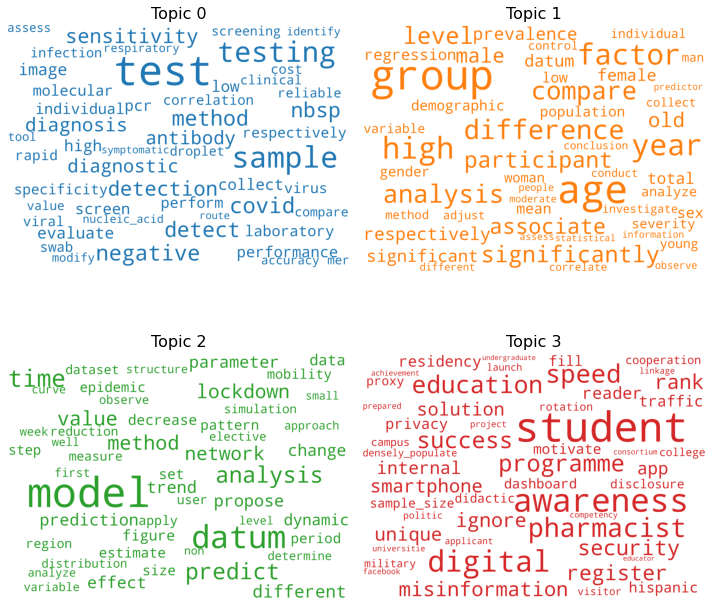

In [59]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_words=50,formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


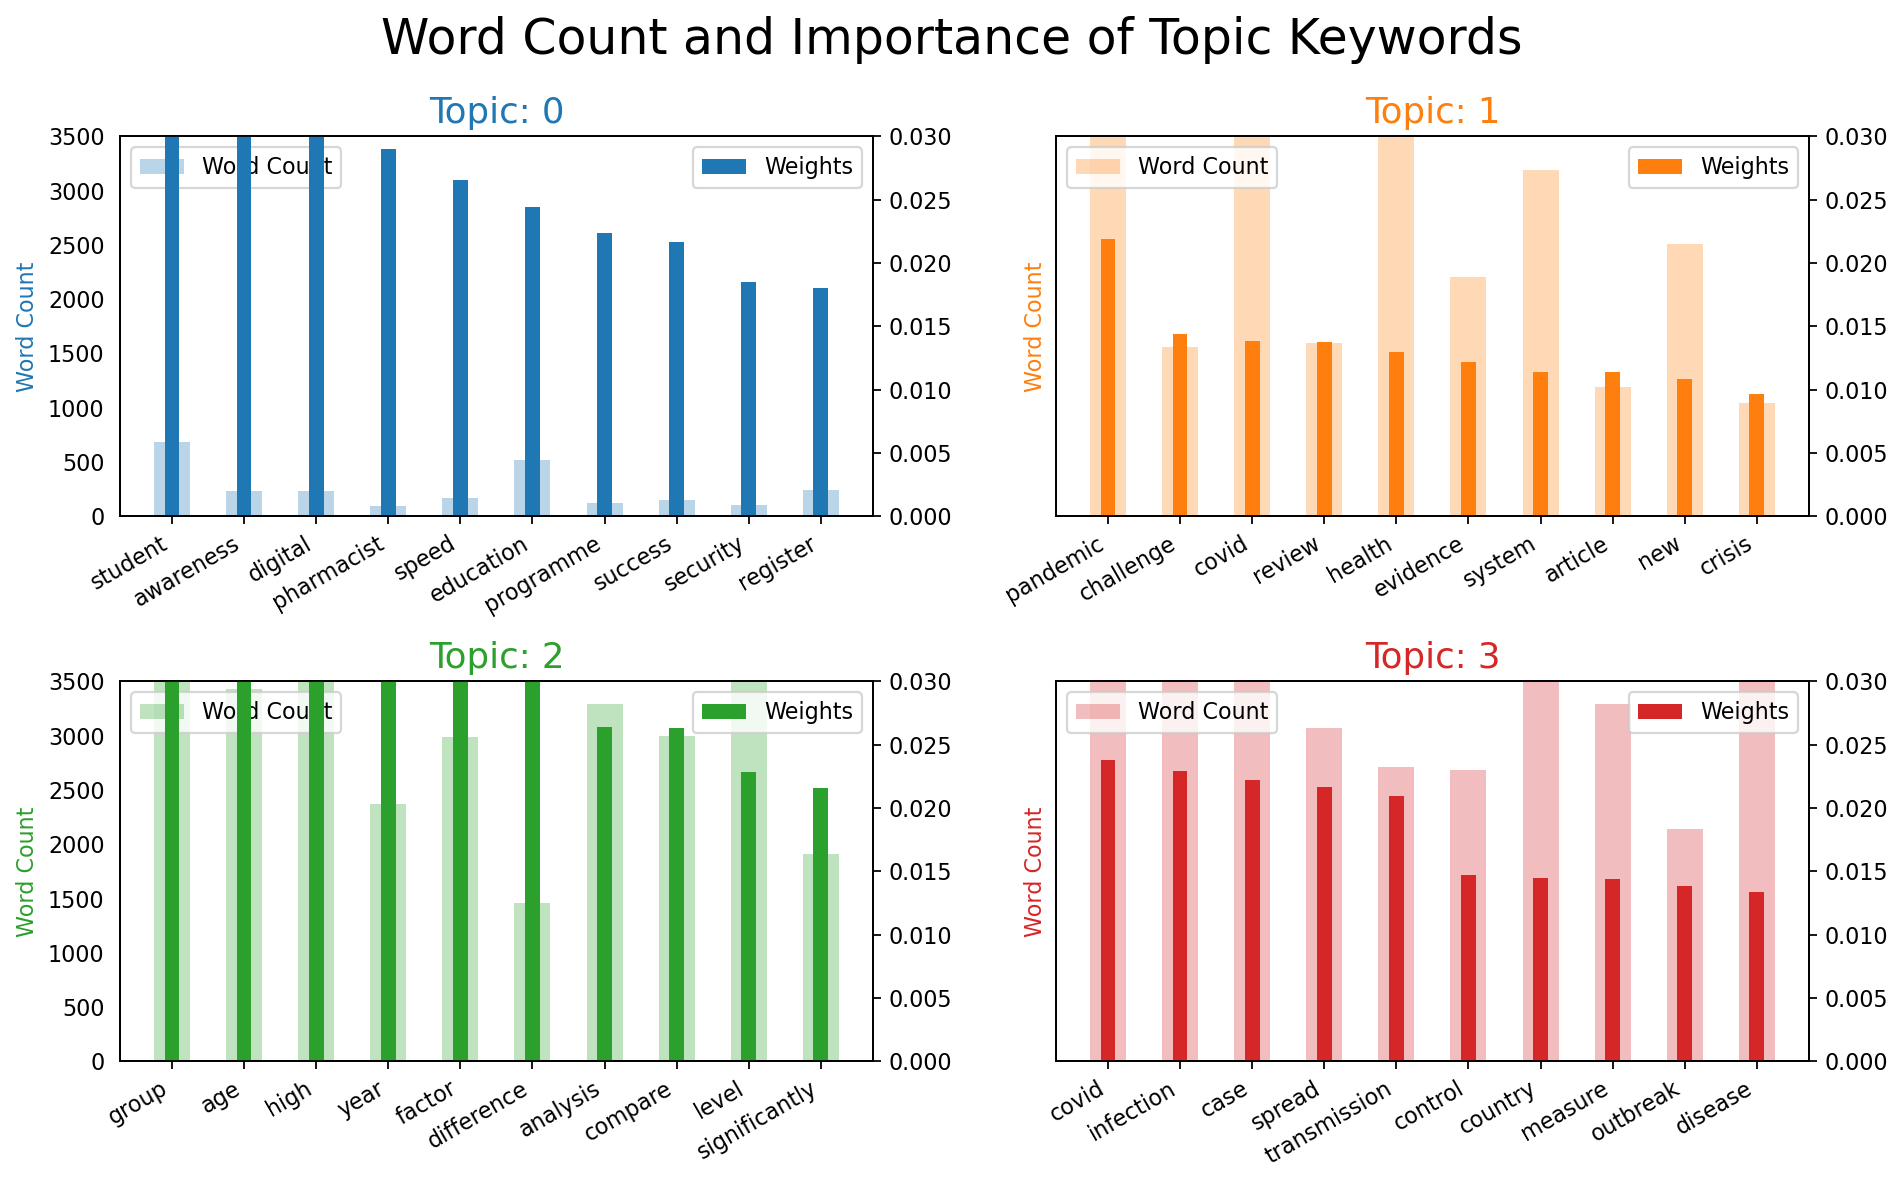

In [64]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(12,7), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Most representative document for each topic

In [33]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7605,"child, student, school, say, education, online...","In the uncorrected manuscript, author Silvio D..."
1,1.0,0.9204,"pandemic, care, covid, health, system, medical...",In the midst of the coronavirus disease 2019 (...
2,2.0,0.7899,"cell, response, immune, infection, viral, viru...",Disrupted antiviral immune responses are assoc...
3,3.0,0.9718,"case, covid, model, country, spread, transmiss...",The coronavirus disease 2019 (COVID-19) is rep...
4,4.0,0.9920,"patient, covid, severe, clinical, disease, cas...",Background: The main clinical manifestations o...


## Building LDA Mallet Model

In [ ]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
    

In [ ]:
#!unzip ./mallet-2.0.8.zip

In [37]:
import os
os.environ.update({'MALLET_HOME': './mallet-2.0.8'})
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=11, id2word=id2word)

In [38]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('datum', 0.022142167643575787),
   ('model', 0.018071989411565674),
   ('covid', 0.01504672246161195),
   ('approach', 0.01267825688895081),
   ('information', 0.01177266711116861),
   ('method', 0.01173286096709027),
   ('propose', 0.010956641157562669),
   ('system', 0.008836963985391145),
   ('tool', 0.008528466368784023),
   ('global', 0.00805079263984396)]),
 (1,
  [('cell', 0.03132667281684888),
   ('virus', 0.02903998272714782),
   ('viral', 0.020364300155063103),
   ('human', 0.01828370659705184),
   ('protein', 0.01732192278249946),
   ('response', 0.015712407011207727),
   ('vaccine', 0.015241329224488193),
   ('target', 0.014544526664965552),
   ('infection', 0.012208765972481207),
   ('drug', 0.01140400808683534)]),
 (4,
  [('care', 0.0400592091351237),
   ('pandemic', 0.03360541340663988),
   ('covid', 0.01927680270670332),
   ('medical', 0.017686614506238107),
   ('health', 0.013144427997462465),
   ('hospital', 0.011689574962994291),
   ('service', 0.01110594205

In [39]:
def compute_mallet_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
mallet_model_list, mallet_coherence_values = compute_mallet_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=8, limit=39)

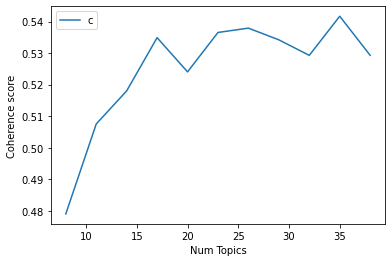

Num Topics = 8  has Coherence Value of 0.479
Num Topics = 11  has Coherence Value of 0.5075
Num Topics = 14  has Coherence Value of 0.518
Num Topics = 17  has Coherence Value of 0.5349
Num Topics = 20  has Coherence Value of 0.5241
Num Topics = 23  has Coherence Value of 0.5366
Num Topics = 26  has Coherence Value of 0.5379
Num Topics = 29  has Coherence Value of 0.5342
Num Topics = 32  has Coherence Value of 0.5293
Num Topics = 35  has Coherence Value of 0.5417
Num Topics = 38  has Coherence Value of 0.5293


In [42]:
# Show graph
limit=39; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, mallet_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, mallet_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

### The Max Coherence value is for 35 number of topics but to compare with the base model let's select number of topics=11

In [43]:
# Select the model with 11 topics and print the topics with 50 words
mallet_optimal_model = mallet_model_list[1]
mallet_model_topics = mallet_optimal_model.show_topics(formatted=False)
pprint(mallet_optimal_model.print_topics(num_words=50))

[(0,
  '0.035*"cell" + 0.033*"infection" + 0.021*"response" + 0.018*"severe" + '
  '0.016*"respiratory" + 0.015*"disease" + 0.015*"immune" + 0.014*"acute" + '
  '0.011*"increase" + 0.011*"viral" + 0.010*"level" + 0.010*"role" + '
  '0.010*"inflammatory" + 0.008*"type" + 0.008*"induce" + 0.008*"effect" + '
  '0.008*"mechanism" + 0.008*"specific" + 0.007*"system" + 0.007*"antibody" + '
  '0.007*"expression" + 0.007*"lung" + 0.006*"function" + 0.006*"inflammation" '
  '+ 0.006*"associate" + 0.006*"lead" + 0.006*"virus" + 0.006*"damage" + '
  '0.005*"covid" + 0.005*"tissue" + 0.005*"immunity" + 0.005*"observe" + '
  '0.005*"blood" + 0.005*"play" + 0.005*"direct" + 0.004*"reduce" + '
  '0.004*"express" + 0.004*"receptor" + 0.004*"infect" + 0.004*"demonstrate" + '
  '0.004*"important" + 0.004*"show" + 0.004*"change" + 0.004*"ace" + '
  '0.004*"anti" + 0.004*"decrease" + 0.004*"mediate" + 0.004*"pathway" + '
  '0.004*"fig" + 0.003*"phase"'),
 (1,
  '0.106*"covid" + 0.026*"clinical" + 0.022*"d

In [45]:
# Select the model with 35 topics and print the topics with 50 words
mallet_optimal_model2 = mallet_model_list[9]
mallet_model_topics = mallet_optimal_model2.show_topics(formatted=False)
pprint(mallet_optimal_model.print_topics(num_words=50))

[(6,
  '0.108*"symptom" + 0.058*"case" + 0.056*"report" + 0.051*"patient" + '
  '0.050*"covid" + 0.020*"fever" + 0.020*"clinical" + 0.018*"onset" + '
  '0.016*"history" + 0.013*"common" + 0.013*"manifestation" + '
  '0.012*"infection" + 0.011*"mild" + 0.011*"stroke" + 0.011*"neurological" + '
  '0.009*"associate" + 0.009*"describe" + 0.008*"disorder" + 0.008*"normal" + '
  '0.007*"complication" + 0.007*"sign" + 0.006*"brain" + 0.006*"cough" + '
  '0.006*"occur" + 0.005*"fatigue" + 0.005*"diagnose" + 0.005*"reveal" + '
  '0.005*"breath" + 0.005*"loss" + 0.005*"diagnosis" + 0.005*"follow" + '
  '0.004*"dyspnea" + 0.004*"shortness" + 0.004*"investigation" + 0.004*"eye" + '
  '0.004*"week" + 0.004*"olfactory" + 0.004*"pain" + 0.004*"taste" + '
  '0.003*"early" + 0.003*"recover" + 0.003*"initial" + 0.003*"cerebrovascular" '
  '+ 0.003*"examination" + 0.003*"acute" + 0.003*"year_old" + 0.003*"seizure" '
  '+ 0.003*"feature" + 0.003*"frequent" + 0.003*"prevalent"'),
 (10,
  '0.070*"child" + 0

### Most representative document for each topic

In [46]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=mallet_optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.1092,"challenge, system, technology, approach, pande...","Headed for the end of 2019, emergence of a Sev..."
1,1,27.0,0.2001,"drug, target, protein, potential, bind, struct...",SARS-CoV-2 is an enveloped virus responsible f...
2,2,11.0,0.1693,"health, public, community, service, response, ...","TO THE EDITORIn Louisiana, African Americans a..."
3,3,16.0,0.2418,"treatment, clinical, trial, therapy, drug, tre...","Background: Recently, chloroquine (CQ) and its..."
4,4,16.0,0.0719,"treatment, clinical, trial, therapy, drug, tre...",The pandemic caused by severe acute respirator...
5,5,28.0,0.2379,"patient, covid, high, acute, failure, respirat...",Patients with coronavirus disease 2019 (COVID-...
6,6,14.0,0.3301,"cell, viral, infection, expression, virus, hos...",Cell entry of the pandemic virus SARS-CoV-2 is...
7,7,24.0,0.1766,"vaccine, virus, human, specific, response, ant...",Human antibody responses to severe acute respi...
8,8,28.0,0.1469,"patient, covid, high, acute, failure, respirat...","The coronavirus disease 2019, also known as CO..."
9,9,19.0,0.0936,"pandemic, crisis, social, economic, public, pe...",The COVID-19 pandemic is the worst pandemic ...


In [47]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3668,"figure, large, report, fig, time, state, repre...",1IntroductionExisting literature documents the...
1,1.0,0.4126,"transmission, virus, spread, contact, exposure...",The coronavirus disease (COVID-19) is a novel ...
2,2.0,0.4089,"response, immune, inflammatory, inflammation, ...",IntroductionCoronavirus disease (COVID)-19 is ...
3,3.0,0.4484,"care, medical, staff, hospital, work, resource...",The ongoing COVID-19 pandemic has disproportio...
4,4.0,0.5482,"mask, risk, reduce, protection, wear, droplet,...",Personal Protective Equipment (PPE) is imperat...


## TF-IDF

In [48]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.09549516174556008),
 (1, 0.05363397640470606),
 (2, 0.02262479456224416),
 (3, 0.07776020511487931),
 (4, 0.05418743312518708),
 (5, 0.04088104204159258),
 (6, 0.10098491886844747),
 (7, 0.0630733693779908),
 (8, 0.0505822394295134),
 (9, 0.051294273449253365),
 (10, 0.02517758886044752),
 (11, 0.06536716887534126),
 (12, 0.02700565615735171),
 (13, 0.06352267924001898),
 (14, 0.08005674075788431),
 (15, 0.15144069579339345),
 (16, 0.14158515974365737),
 (17, 0.04738958265839475),
 (18, 0.01045950304095376),
 (19, 0.04976620060718948),
 (20, 0.09020136114974615),
 (21, 0.06138854096471458),
 (22, 0.0850455153115376),
 (23, 0.0805779795200907),
 (24, 0.0864919448375237),
 (25, 0.14542390963322557),
 (26, 0.10249718393746146),
 (27, 0.06853424125835998),
 (28, 0.07793991986939884),
 (29, 0.03356127258794163),
 (30, 0.04635812401869885),
 (31, 0.10098491886844747),
 (32, 0.06054254672849923),
 (33, 0.029505005629490925),
 (34, 0.07655382962159084),
 (35, 0.059677190248074496),
 (36

## Running LDA using TF-IDF

In [49]:
lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                                  id2word=id2word,
                                                  num_topics=11,
                                                  random_state=100)
# Show Topics
pprint(lda_model_tfidf.show_topics(formatted=False))

[(7,
  [('ocular', 0.0019266638),
   ('test', 0.0016604617),
   ('favipiravir', 0.0015566429),
   ('hispanic', 0.0013528765),
   ('ai', 0.001266738),
   ('sample', 0.0012589712),
   ('patient', 0.0012084921),
   ('lus', 0.0011969991),
   ('sensitivity', 0.0011524751),
   ('image', 0.001143738)]),
 (6,
  [('model', 0.004017058),
   ('health', 0.0038475816),
   ('country', 0.0035816452),
   ('case', 0.0035325766),
   ('care', 0.0032829924),
   ('pandemic', 0.0032652426),
   ('transmission', 0.0029430941),
   ('measure', 0.0028673415),
   ('epidemic', 0.0027078884),
   ('patient', 0.002696102)]),
 (8,
  [('pm', 0.0018755028),
   ('drug_repurpose', 0.0015951219),
   ('autopsy', 0.0014722574),
   ('ozone', 0.001402527),
   ('postpartum', 0.0014005114),
   ('d', 0.001307269),
   ('subpleural', 0.0013066494),
   ('patient', 0.0011412841),
   ('literacy', 0.0010838344),
   ('case', 0.0010191036)]),
 (0,
  [('cutaneous', 0.0016465848),
   ('dic', 0.0012025189),
   ('probiotic', 0.0010251666),
 

In [50]:
# Compute Coherence Score
coherence_lda_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldatfidf = coherence_lda_model_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)


Coherence Score:  0.5247987556249452


### Finding the optimal number of topics for LDA with TF-IDF

In [51]:
def compute_lda_tfidf_coherence(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_tfidf_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics, 
                                                    random_state=100)
        model_list.append(lda_tfidf_model)
        coherencemodel = CoherenceModel(model=lda_tfidf_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [53]:
LDA_tfidf_model_list, LDA_tfidf_coherence_values = compute_lda_tfidf_coherence(dictionary=id2word, corpus=corpus_tfidf, texts=data_lemmatized, start=8, limit=39)

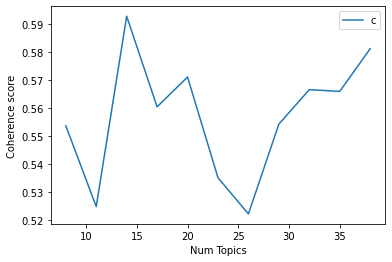

Num Topics = 8  has Coherence Value of 0.5537
Num Topics = 11  has Coherence Value of 0.5248
Num Topics = 14  has Coherence Value of 0.5929
Num Topics = 17  has Coherence Value of 0.5605
Num Topics = 20  has Coherence Value of 0.5711
Num Topics = 23  has Coherence Value of 0.5351
Num Topics = 26  has Coherence Value of 0.5222
Num Topics = 29  has Coherence Value of 0.5543
Num Topics = 32  has Coherence Value of 0.5666
Num Topics = 35  has Coherence Value of 0.566
Num Topics = 38  has Coherence Value of 0.5812


In [54]:
# Show graph
limit=39; start=8; step=3;
x = range(start, limit, step)
plt.plot(x, LDA_tfidf_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, LDA_tfidf_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [56]:
# Select the model with 11 topics and print the topics with 50 words
lda_tfidf_optimal_model = LDA_tfidf_model_list[1]
lda_tfidf_model_topics = lda_tfidf_optimal_model.show_topics(formatted=False)
pprint(lda_tfidf_optimal_model.print_topics(num_words=50))

[(0,
  '0.002*"cutaneous" + 0.001*"dic" + 0.001*"probiotic" + '
  '0.001*"transplant_recipient" + 0.001*"anaesthetic" + 0.001*"dermatologist" '
  '+ 0.001*"microvascular" + 0.001*"expire" + 0.001*"seasonality" + '
  '0.001*"acupuncture" + 0.001*"comparator" + 0.001*"robot" + '
  '0.001*"chilblain" + 0.001*"resection" + 0.001*"degrade" + '
  '0.001*"olfactory_dysfunction" + 0.001*"optimistic" + 0.001*"urticarial" + '
  '0.001*"thiol" + 0.001*"trip" + 0.001*"skin" + 0.001*"precautionary_measure" '
  '+ 0.001*"equilibrium" + 0.000*"anxious" + 0.000*"toe" + 0.000*"slide" + '
  '0.000*"hcps" + 0.000*"disulfide" + 0.000*"chemokine" + 0.000*"sentence" + '
  '0.000*"fiscal" + 0.000*"orf" + 0.000*"obstructive" + 0.000*"patient" + '
  '0.000*"clot" + 0.000*"hypoalbuminemia" + 0.000*"superimposed_bacterial" + '
  '0.000*"robotic" + 0.000*"humor" + 0.000*"retrieval" + 0.000*"rash" + '
  '0.000*"descriptor" + 0.000*"sadness" + 0.000*"gland" + 0.000*"kap" + '
  '0.000*"health" + 0.000*"protein" + 0.

In [58]:
# Select the model with 11 topics and print the topics with 50 words
lda_tfidf_optimal_model = LDA_tfidf_model_list[2]
lda_tfidf_model_topics = lda_tfidf_optimal_model.show_topics(formatted=False)
pprint(lda_tfidf_optimal_model.print_topics(num_words=50))

[(0,
  '0.003*"stemi" + 0.002*"dental" + 0.002*"coronary" + 0.001*"bank" + '
  '0.001*"dentist" + 0.001*"pci" + 0.001*"pharmacist" + '
  '0.001*"primary_percutaneous" + 0.001*"subpopulation" + '
  '0.001*"numerical_simulation" + 0.001*"ritual" + 0.001*"selenium" + '
  '0.001*"antenatal" + 0.001*"cd" + 0.001*"rct" + 0.001*"concordance" + '
  '0.001*"basal" + 0.001*"formal" + 0.001*"australian" + 0.001*"fomite" + '
  '0.001*"bereavement" + 0.001*"regulator" + 0.001*"marginal" + '
  '0.001*"velocity" + 0.001*"pharmacophore" + 0.001*"undetectable" + '
  '0.001*"intensivist" + 0.001*"progeny" + 0.001*"atrial" + 0.001*"discordant" '
  '+ 0.001*"antiretroviral" + 0.001*"patient" + 0.001*"ritonavir" + '
  '0.001*"rejection" + 0.001*"pharmacy" + 0.001*"grief" + 0.001*"transmission" '
  '+ 0.001*"proliferate" + 0.000*"free_energy" + 0.000*"fluctuation" + '
  '0.000*"macroeconomic" + 0.000*"calibrate" + 0.000*"satisfy" + 0.000*"pc" + '
  '0.000*"practice" + 0.000*"counseling" + 0.000*"jordanian" 